# Flowers Classification

__scikit-learn__ (`sklearn`) is a Python package which contains a large number of functions for doing machine learning, including classification.
<br>
It contains many subpackages. In the code below we import the necessary subpackages when they are needed.

__scikit-learn__（`sklearn`）は、分類など機械学習を実行するための多数の関数を含むPythonパッケージです。
<br>
多くのサブパッケージが含まれています。以下のコードでは、必要なサブパッケージを適宜にインポートします。

## Iris dataset / アヤメのデータセット

### Observations and labels / 観測とラベル

We use the "iris dataset" with 150 records and five attributes: flower type, sepal length, sepal width, petal length, petal width.

150のサンプルと5つの属性（花の種類、がくの長さ、がくの幅、花びらの長さ、花びらの幅）を持つ「アヤメのデータセット」を使用します。
<br>
<img src="./img/petal-sepal.jpg" width="150">

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = np.genfromtxt('iris_data.csv', delimiter=',')

Each sample is composed of:
- A flower type 0 (iris setosa), 1 (iris versicolor) or 2 (iris virginica) ⇒ labels
- The 4 sepal and petal measurements ⇒ observations

各サンプルは次のもので構成されています。
- 花の種類：0（ヒオウギアヤメ）、1（ブルーフラッグ）または 2（バージニカ） ⇒ ラベル
- 花びらとがくの4つの測定データ ⇒ 観察

In the remainder, we will use the letters `X` for the observations and `y` for the labels.

これ以降は、観測には文字`X`を使用し、ラベルには`y`を使用します。

In [3]:
X = iris[:,1:]
y = iris[:,0]
print("X has shape:", X.shape)
print("y has shape:", y.shape)

X has shape: (150, 4)
y has shape: (150,)


### Data preparation / データの準備

#### Spliting into training and testing set / トレーニングとテストセットに分割

Most times a classifier is trained in order to correctly predict labels for _new future observations_.
<br>
Consequently, what really matters is the performance of the classifier when presented with new obervations.
<br>
A practical way to measure future performance is to split the available examples in two sets:
- A set that is used for training ⇒ __training set__
- A set that is used for testing the performance ⇒ __testing set__


ほとんどの場合、分類器をトレーニングさせるり用は_新しい将来の観測_のラベルを正しく予測するためです。
<br>
そのため、本当に重要なのは、新しい観測を提示したときの分類器のパフォーマンスです。
<br>
将来のパフォーマンスを測定する実際的な方法は、使用可能な例を2つのセットに分割することです。
- トレーニングに使用されるセット ⇒ __トレーニングセット__
- パフォーマンスのテストに使用されるセット ⇒ __テストセット__

The examples in the testing set are playing the role of the "never seen before" observations.
<br>
Computing the accuracy on the testing set gives us an idea of how well the trained classifier __generalizes__, i.e. how well it classifies observations that are not part of the training set.

テストセットは、「これまでに見たことのない」観測の役割を果たしています。
<br>
テストセットの精度を計算すると、トレーニングされた分類器がどの程度__一般化__するか（つまり、トレーニングセットに入ってない観測をどの程度適切に分類でいるか）がわかります。

First, let us divide the dataset into a ____ and a __testing__ set.
<br>
The samples will be _randomly_ associated to the training or the testing set.

まず、データセットを__トレーニングセット__と__テストセット__に分割しましょう。
<br>
サンプルは、トレーニングまたはテストセットに_ランダムに_割り当てられます。

_▶ Using sklearn to split data / sklearnを使用したデータの分割_

We use the function `train_test_split` from `sklearn.model_selection` to split the data into training and testing sets.

`sklearn.model_selection`の`train_test_split`関数を使用して、データをトレーニングセットとテストセットに分割できます。

In [4]:
from sklearn.model_selection import train_test_split

# test_size=0.3 ⇒ 30％ of data in test set, the rest (70%) in training set
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 105
Testing set size: 45


Let's check how many flowers of each species are in the training set and the testing set.

トレーニングセットとテストセットに含まれる各種の花の数を確認してみましょう。

In [5]:
print("training set:")
print("Iris setosa:", np.sum(y_train == 0))
print("Iris versicolor:", np.sum(y_train == 1))
print("Iris virginica:", np.sum(y_train == 2))

training set:
Iris setosa: 35
Iris versicolor: 36
Iris virginica: 34


In [6]:
print("testing set:")
print("Iris setosa:", np.sum(y_test == 0))
print("Iris versicolor:", np.sum(y_test == 1))
print("Iris virginica:", np.sum(y_test == 2))

testing set:
Iris setosa: 15
Iris versicolor: 14
Iris virginica: 16


_▶ Manually splitting data / 手動のデータ分割 (optional)_

For reference, here is the code for splitting the data manually. It does the same thing as `train_test_split`.
<br>
(If you want to run the code, first transform the cell into a code cell.)

参考までに、データを手動で分割するコードを次に示します。`train_test_split`と同じことを行います。
<br>
（コードを実行したい場合は、まずセルをコードセルに変換してください。）

#### Data standardization / データの標準化

The goal of standardization is to transform the features so that they have zero mean and unit variance. This is important to do to prevent that some features have larger influence on the result than others. 

標準化の目的は、平均と単位分散がゼロになるように特徴を変換することです。これは、一部の機能が他の機能よりも結果に大きな影響を与えることを防ぐために行うことが重要です。

The package `sklearn.preprocessing` provides a `StandardScaler` that computes the scaling parameters from a training set and makes it possible to easily apply these parameters to new data. This is the function we will usually use for scaling.

パッケージ`sklearn.preprocessing`は、トレーニングセットからスケーリングパラメーターを計算し、これらのパラメーターを新しいデータに適用できるようにする`StandardScaler`を提供します。標準化を行うために使用します。

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

First, the parameters of the `StandardScaler` have to be computed from the training set. This is done with the method `fit`.

まず、`StandardScaler`のパラメーターをトレーニングセットから計算する必要があります。これはメソッド`fit`で行われます。

In [8]:
scaler.fit(X_train);

Then, we can create a scaled training set using the method `transform`.

次に、`transform`メソッドを使用して、スケーリングされたトレーニングセットを作成できます。

In [9]:
X_train_raw = X_train # We keep a copy of the original training set for plotting
X_train = scaler.transform(X_train_raw)

Let's see how the scaled data looks like.

スケーリングされたデータがどのように見えるか見てみましょう。

Text(0.5, 0, 'samples')

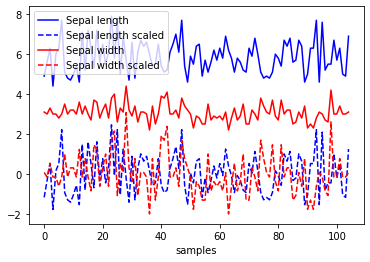

In [10]:
plt.plot(X_train_raw[:,0], 'b-', label="Sepal length")
plt.plot(X_train[:,0], 'b--', label="Sepal length scaled")
plt.plot(X_train_raw[:,1], 'r-', label="Sepal width")
plt.plot(X_train[:,1], 'r--', label="Sepal width scaled")
plt.legend()
plt.xlabel("samples")

We need to scale also the observations in the test set.

テストセットの観測値もスケーリングする必要があります。

In [11]:
# この時test_trainでスケーリングする
X_test_raw = X_test
X_test = scaler.transform(X_test_raw)

> IMPORTANT: Fit the scaler to the _training data only_, not to the full dataset (including the test set). Only then use it to transform both the training set and the test set.

>重要：fit関数は全部のデータセットではなく、_トレーニングデータのみ_に適合させます。それを使用してトレーニングセットとテストセットの両方を変換します。

## Try  it yourself ! / 自分で試そう！

[Click here](session4-playground1.ipynb) to open a sample notebook and try doing data processing

[ここをクリックして](session4-playground1.ipynb)、サンプルのノートブックを開き、データ処理を行ってみてください

---

## Classification using SVMs / SVMを使った分類

**Support Vector Machines (SVMs)** are a set of often used supervised learning algorithms. <br>
(In this practical course we do not go into the much theoretical details about the used methods. For a quick overview of SVMs see the [wikipedia page](https://en.wikipedia.org/wiki/Support-vector_machine).)

サポートベクターマシン（SVM）は、よく使用される教師あり学習アルゴリズムです。
<br>
（この実習では、使用される方法に関する理論的な詳細については学びません。SVMの概要については、[wikipediaページ](https://en.wikipedia.org/wiki/Support-vector_machine)などを参照してください。）

Let us import the `LinearSVC` classifer from the package `sklearn.svm`.
<br>
__SVC__ in the classifier name stands for Support Vector Classification; `LinearSVC` is an SVM based classifier using a linear model.

パッケージ`sklearn.svm`から`LinearSVC`分類器をインポートしましょう。
<br>
分類器名の__SVC__は、Support Vector Classification（サポートベクター分類）を表します。`LinearSVC`は、線形モデルを使用したSVMの分類器です。

In [12]:
from sklearn.svm import LinearSVC

The `LinearSVC` is based on the following linear model:
$y_\text{prediction} = \text{f}(\mathbf{W} \mathbf{X} + \mathbf{b})$
<br>
Namely, the prediction is a weighted sum of the observations plus a bias ($\mathbf{W} \mathbf{X} + \mathbf{b}$), that goes through a decision function $\text{f}(\cdot)$.

`LinearSVC`は次の線形モデルに基づいています：
$y_\text{prediction} = \text{f}(\mathbf{W} \mathbf{X} + \mathbf{b})$
<br>
つまり、予測は観測値とバイアス（$\mathbf{W} \mathbf{X} + \mathbf{b}$）の加重和であり、和の結果は決定関数$\text{f}(\cdot)$を通ります。

To create the classifier do the following.

分類器を作成するには、次を実行します。

In [13]:
linear_SVC = LinearSVC()

The goal of the training is to find a set of parameters such that the classifier is able to predict the label associated to the feature for the training set.
<br>
The `LinearSVC` provides the method `fit` that does it for us:

トレーニングの目的は、分類器がトレーニングセットの特徴に関連付けられたラベルを予測できるように、適宜なパラメータを見つけることです。
<br>
`LinearSVC`はそれを行うためのメソッド` fit`を提供しています。

In [14]:
linear_SVC.fit(X_train, y_train); 

The `fit` method tunes the parameter of the classifier `(w,b)`.
<br>
It goes through the training set and updates the weights $\mathbf{W}$ and bias $\mathbf{b}$  of the classifier in order to classify the samples.

`fit`メソッドは分類器のパラメーター`(w,b)`を調整します。
<br>
サンプルを分類するために、トレーニングセットを使用し、分類器の重み$\mathbf{W}$とバイアス$\mathbf{b}$の値を更新します。

Now that the classifier has been trained on the training set, let us use the testing set to check the performance. First we will try it on a single sample.
<br>
The `predict` function gives the predicted value.


分類器がトレーニングセットでトレーニングされたあと、テストセットを使用してパフォーマンスを確認します。まず、1つだけのサンプルで試してみましょう。
<br>
予測は`predict`関数を使用して行います。

In [15]:
i = 0

# The ith test sample is composed of
# the label
y_i = y_test[i]
# the features (reshape is used because predict needs a 2D array)
X_i = X_test[i].reshape(1, -1)

print(y_i, X_i)

# Show the truth
print("True Flower type:", y_i)

# Using predict method
# the input X_i is an array with a single feature
# the result is an array with a single element
y_pred = linear_SVC.predict(X_i)
y_pred = y_pred[0]

print("Prediction:", y_pred)

# Check the prediction
if y_pred == y_i:
    print("This is a correct prediction")
else:
    print("This is not a correct prediction")    

2.0 [[ 0.39796597 -0.61994344  0.60165916  0.79328267]]
True Flower type: 2.0
Prediction: 2.0
This is a correct prediction


The `predict` function can be applied to the whole testing set in one call.

`predict`関数は、一括にテストセット全体に適用できます。

In [16]:
y_pred = linear_SVC.predict(X_test)

Then, we can compare the prediction to the labels of the test set.

次に、予測結果をテストセットのラベルと比較できます。

In [17]:
# Compare the prediction to the truth
res = (y_pred == y_test)

print(y_pred.shape, y_test.shape)

# Show a few examples
for i in range(10):
    print("True labels:", y_test[i],  "\t Predicted labels:", y_pred[i], "\tCorrect prediction:", res[i])

(45,) (45,)
True labels: 2.0 	 Predicted labels: 2.0 	Correct prediction: True
True labels: 1.0 	 Predicted labels: 2.0 	Correct prediction: False
True labels: 1.0 	 Predicted labels: 1.0 	Correct prediction: True
True labels: 2.0 	 Predicted labels: 2.0 	Correct prediction: True
True labels: 1.0 	 Predicted labels: 1.0 	Correct prediction: True
True labels: 0.0 	 Predicted labels: 0.0 	Correct prediction: True
True labels: 0.0 	 Predicted labels: 0.0 	Correct prediction: True
True labels: 0.0 	 Predicted labels: 0.0 	Correct prediction: True
True labels: 1.0 	 Predicted labels: 1.0 	Correct prediction: True
True labels: 0.0 	 Predicted labels: 0.0 	Correct prediction: True


#### Classification accuracy / 分類精度

We would like to know if the classifier performs "well enough".
<br>
Thus, we need a way to measure the __performance__ of the classifier.

One simple measure is to determine the proportion of the predictions made by the classifier that are correct. This is called the __accuracy__ of the classifier.

分類器が「十分に機能する」かどうかを確認したいです。
<br>
したがって、分類子の__パフォーマンス__を測定する方法が必要です。

簡単な方法の1つは、分類器によって行われた予測のうち、正しいものの割合を決定することです。これは、分類器の__精度__と呼ばれます。

`sklearn` provides a function to compute the accuracy.

`sklearn`は精度を計算する関数を提供します。

In [18]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test,  y_pred)
print("Accuracy: {:.02f}".format(A))

Accuracy: 0.93


####  Confusion matrix / 混同行列

A convenient representation of the classification result is the __confusion matrix__.
<br>
The confusion matrix is a square matrix of size number_class x number_class.
<br>
The element `[i, j]` contains the count of the element of class `i` that were predicted as being of class `j`.

Let us use the implementation of `sklearn`.


分類結果の便利な表現の一つは__混同行列__です。
<br>
混同行列は、サイズ<クラス数>x<クラス数>の正方行列です。
<br>
行列の要素`[i, j]`には、クラス`j`であると予測されたクラス`i`の要素の数が入っています。

`sklearn`の実装を使用してみましょう。

In [19]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print(CM)

[[14  1  0]
 [ 0 13  1]
 [ 0  1 15]]


In this case, the confusion matrix is a `3x3` matrix.

The terms on the diagonal correspond to the correct predictions.

この場合、混同行列は「3x3」の行列です。

対角線上の要素は、正しい予測です。

In [20]:
for i in range(3):
    print("The number of correctly predicted {} is given by CM[{},{}] = {} \n".format(i, i, i, CM[i, i]))

The number of correctly predicted 0 is given by CM[0,0] = 14 

The number of correctly predicted 1 is given by CM[1,1] = 13 

The number of correctly predicted 2 is given by CM[2,2] = 15 



Note that the accuracy can be calculated from the confusion matrix, by calculating as the ratio of the sum of the diagonal terms to the sum of all the terms.

注意：混同行列の対角の要素の合計とすべての要素の合計の比率を計算すれば分類の精度が得られます。

In [21]:
A = np.sum(np.diag(CM)) / np.sum(CM)
print("Accuracy: {:.02f}".format(A))

Accuracy: 0.93


## Try  it yourself ! / 自分で試そう！

[Click here](session4-playground2.ipynb) to open a sample notebook and train your own classifier

[ここをクリックして](session4-playground2.ipynb)、サンプルのノートブックを開き、自分で分類器を学習させてみましょう


---

### Learn more / 更に学ぶ (optional)

#### Other measures of performance / パフォーマンスの他の測定方法

Not all classes were equaly well predicted.
<br>
Thus, it is also usefull to give performance index per class.

In addition to the accuracy, other metrics of interest are:
- __precision__: the ratio of predictions for a class that are correct,
- __recall__: the ratio of samples from a class that are correctly predicted,
- __f-score__: the geometric mean of precision and recall 

Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall


以上はすべてのクラスが等しく予測されていたわけではありません。
<br>
クラスごとのパフォーマンスインデックスを指定できれば役立ちます。

精度以外、関心のある他のパフォーマンス測定方法は次のとおりです。
- __適合率__：正しいクラスの予測の比率、
- __再現率__：正しく予測されたクラスのサンプルの比率、
- __f値__：精度と再現率の幾何平均

In [27]:
P = np.diag(CM) / np.sum(CM, axis = 0)
R = np.diag(CM) / np.sum(CM, axis = 1)
F = 2.0 * R * P / (R + P) # 1 / ((1/P + 1/R) / 2 ) = 2 * R * P / (R + P)
for i in range(3):
    print("Class '{}' : P = {:.02f} R = {:.02f}  F = {:.02f}".format(i, P[i], R[i], F[i]))

Class '0' : P = 1.00 R = 0.93  F = 0.97
Class '1' : P = 0.87 R = 0.93  F = 0.90
Class '2' : P = 0.94 R = 0.94  F = 0.94


#### Cross-validation / 相互検証

Since the samples are selected at random, for different trials the obtained accuracy can be different. Try this: select the cell above with the title "Confusion matrix" and run `Cell->Run All Above` from the menu. Do it several times, and see how the accuracy changes.

In order to reduce the influence the sample selection on the accuracy result, it is often good to use __cross-validation__.
<br>
In cross-validation, the random selection process is repeated several times and the results are averaged.

Cross-validation is done by first spliting the data into `k` equal parts (also called folds). Then the training is done with `k-1` parts and predicted on the remaining part. This is repeated for all `k` times and the results are averaged.

This can be done manually, but `sklearn` also provides a function for that.

サンプルはランダムに選択されるため、試行ごとに得られる精度は異なる場合があります。 これを試してください：タイトルが「混同行列」の上のセルを選択し、メニューから「セル->すべて上に実行」を実行します。 それを数回行い、精度がどのように変化するかを確認します。

精度の結果に対するサンプルの選択の影響を減らすために、__相互検証__を使用することはよくあります。
<br>
相互検証では、ランダム選択プロセスが数回繰り返され、結果が平均化されます。

相互検証は、最初にデータを`k`の等しい部分（この部分は一般「分割」と呼ばれる）に分けることによって行われます。次に、トレーニングは`k-1`部分で行われ、残りの部分で予測されます。これは`k`回繰り返し、平均をとって結果を計算します。

これは手動で行うことができますが、`sklearn`はそのための機能も提供します。

In [34]:
from sklearn.model_selection import cross_val_score

# Reloal the dataset
X = iris[:,1:]
y = iris[:,0]

# Create a classifier
linear_SVC = LinearSVC(max_iter=10000)

# Select the number of parts (folds)
number_of_parts = 2

# Compute the average and std of accuracy
A = cross_val_score(linear_SVC, X, y, cv=number_of_parts, scoring="accuracy")
print("Accuracy: {:.02f} +/- {:.02f}".format(A.mean(), A.std()))

Accuracy: 0.97 +/- 0.02


Try running the above cell several times. See how there is little variation in the result.

Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)

上記のセルを数回実行し、結果にほとんど変化がないことを確認してください。

ウィキペディア：https://ja.wikipedia.org/wiki/交差検証